# Importing Packages 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression ,Lasso 


### Read & Analyse Data 

In [2]:
df = pd.read_csv(r'Data.csv')

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Read & Analyse Data 

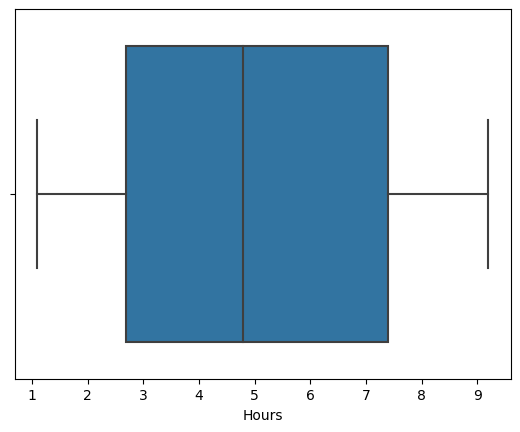

In [5]:
sns.boxplot(data = df , x = 'Hours');

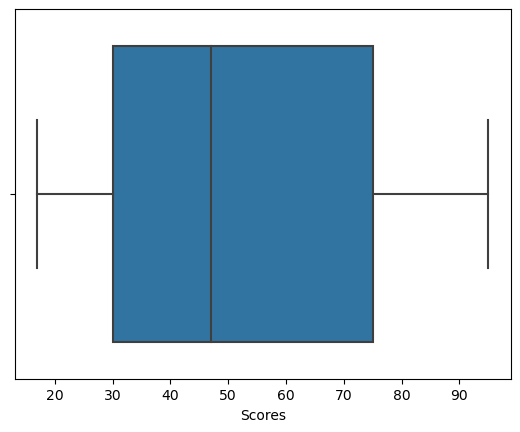

In [6]:
sns.boxplot(data = df , x = 'Scores');

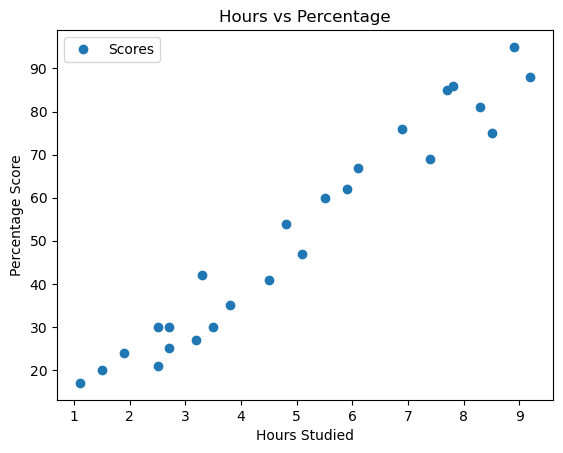

In [7]:
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# Normalization & Encoding 

In [8]:
x = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2 , random_state=42)

# Linear Regression Model Implementation

In [10]:
model = Lasso(alpha=0.001)

In [11]:
model.fit(x_train,y_train)

Lasso(alpha=0.001)

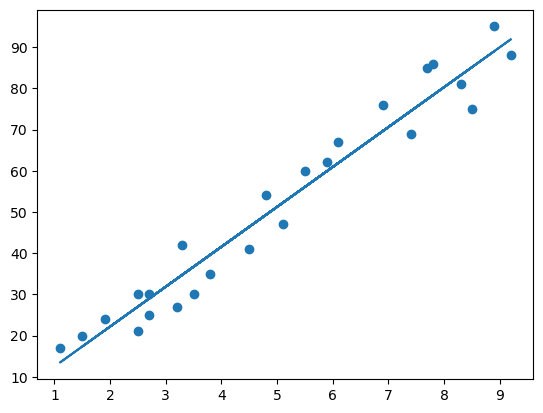

In [12]:
line = model.coef_*x+model.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

In [13]:
model.score(x_train,y_train)

0.9491209373780258

In [14]:
model.score(x_test,y_test)

0.9678039787324731

In [19]:
print(x_test) # Testing data - In Hours
y_pred_t = model.predict(x_test) # Predicting the scores

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


array([83.18760744, 27.03248075, 27.03248075, 69.63292169, 59.95100329])

In [20]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_t})  
df

,Actual,Predicted
0,81,83.187607
1,30,27.032481
2,21,27.032481
3,76,69.632922
4,62,59.951003


In [27]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred_t)) 

Mean Absolute Error: 3.920736492315558


In [29]:
hours=9
x_pred = np.array([hours]).reshape(-1, 1)  # Reshape the input to a 2D array
y_pred = model.predict(x_pred)  # Make predictions
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(y_pred[0]))

No of Hours = 9
Predicted Score = 89.96495031472665
